In [1]:
import dynamo as dyn
import numpy as np
from scipy import stats,signal
# import scvelo as scv
from matplotlib import pyplot as plt
from scipy import sparse
from sklearn.neighbors import KernelDensity
import networkx as nx
import os
from numpy.random import randint

In [2]:
data_path='C:/Users/zoro/Desktop/Frustration_paper/data_analysis/data/'
main_path='C:/Users/zoro/Desktop/Frustration_paper/data_analysis/'
result_path='result/'
gene_arr=np.load(result_path+'EG_bin_genes.npy',allow_pickle=True)


In [3]:
dim_n=10

In [4]:
adata=dyn.read(result_path+'EG_ori_bin.h5ad')
t_list=['Ngn3 low EP','Ngn3 high EP','Fev+','Alpha']

In [5]:
adata

AnnData object with n_obs × n_vars = 1731 × 470
    obs: 'day', 'proliferation', 'G2M_score', 'S_score', 'phase', 'clusters_coarse', 'clusters', 'clusters_fine', 'louvain_Alpha', 'louvain_Beta', 'palantir_pseudotime'
    var: 'highly_variable_genes'
    uns: 'clusters_colors', 'clusters_fine_colors', 'louvain_Alpha_colors', 'louvain_Beta_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [6]:
dyn.pp.recipe_monocle(adata,keep_filtered_genes=False,keep_filtered_cells=True)

|-----> apply Monocole recipe to adata...
|-----> <insert> pp to uns in AnnData Object.
|-----------> <insert> has_splicing to uns['pp'] in AnnData Object.
|-----------> <insert> has_labling to uns['pp'] in AnnData Object.
|-----------> <insert> splicing_labeling to uns['pp'] in AnnData Object.
|-----------> <insert> has_protein to uns['pp'] in AnnData Object.
|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
|-----------> <insert> tkey to uns['pp'] in AnnData Object.
|-----------> <insert> experiment_type to uns['pp'] in AnnData Object.
|-----> filtering cells...
|-----> filtering genes...
|-----> calculating size factor...
|-----? only 349 genes passed basic filtering, but you requested 2000 genes for feature selection. Try lowering the gene selection stringency: {'min_expr_cells': 0, 'min_expr_avg': 0, 'max_expr_avg': inf, 'svr_gamma': None, 'winsorize': Fal

|-----> calculating first/second moments begins...
|
|-----> [moments calculation] finished [29.5238s]
C:\Users\zoro\Anaconda3\envs\scrna\lib\site-packages\pandas-1.2.4-py3.7-win-amd64.egg\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
estimating gamma: 100%|██████████████████████████████████████████████████████████████| 470/470 [00:06<00:00, 76.82it/s]
|-----> retrive data for non-linear dimension reduction...
|-----? adata already have basis umap. dimension reduction umap will be skipped! 
set enforce=True to re-performing dimension reduction.
|
|-----> [dimension_reduction projection] finished [0.0010s]


<Figure size 600x400 with 0 Axes>

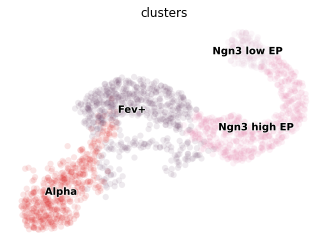

In [7]:
dyn.tl.dynamics(adata,assumption_mRNA='kinetic')
dyn.tl.reduceDimension(adata)
dyn.pl.umap(adata, color='clusters',pointsize=0.1)

In [8]:
# dyn.tl.neighbors(adata,n_neighbors=20)

In [9]:
# np.where(adata.obsp['connectivities'].A[0,:])
# adata.uns['neighbors']['distances']

In [10]:
dyn.tl.cell_velocities(adata, method='fp',basis='pca',  correct_density=False)#ekey='M_s',vkey='velocity_S',


|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%
|-----> [projecting velocity vector to low dimensional embedding] finished [0.8008s]


AnnData object with n_obs × n_vars = 1731 × 470
    obs: 'day', 'proliferation', 'G2M_score', 'S_score', 'phase', 'clusters_coarse', 'clusters', 'clusters_fine', 'louvain_Alpha', 'louvain_Beta', 'palantir_pseudotime', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr'
    var: 'highly_variable_genes', 'nCells', 'nCounts', 'pass_basic_filter', 'use_for_pca', 'frac', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'clusters_colors', 'clusters_fine_colors', 'louvain_Alpha_colors', 'louvain_Beta_colors', 'neighbors', 'pca', 'pp', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'dynamics', 'grid_velocity_pca'
    obsm: 'X_pca', 'X_umap'

In [11]:
# adata.uns['umap_fit'].clear()
# adata.write(result_path+'EG_dyn.h5ad')

<Figure size 600x400 with 0 Axes>

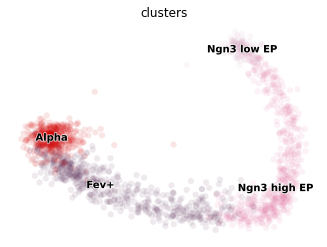

In [12]:
dyn.pl.pca(adata, color='clusters',pointsize=0.1)

In [13]:
# Trans=adata.obsp['fp_transition_matrix']

# plt.hist(Trans.data,bins=100)
# plt.show()
# # Trans.data[Trans.data<0.01]=1e-20
# # Trans.data=-np.log(Trans.data)
# plt.hist(-np.log(Trans.data),bins=100)
# plt.show()
# Trans.count_nonzero()

In [15]:

# # for t1 in range(len(t_list)):
# #     t1_inds=np.where(np.array(adata.obs['sample'])==t_list[t1])[0]
# # #     print(t1_inds)
# #     for t2 in range(len(t_list)):
# #         if abs(t2-t1)>1:
# #             print(t_list[t1],t_list[t2])
# #             t2_inds=np.where(np.array(adata.obs['sample'])==t_list[t2])[0]
# #             Trans[t1_inds[:,None],t2_inds]=0#this way is slow

# for t1 in range(len(t_list)):
#     t1_inds=np.where(np.array(adata.obs['clusters'])==t_list[t1])[0]
#     for i in t1_inds:
#         mask=np.zeros(Trans.data[Trans.indptr[i]:Trans.indptr[i+1]].shape)
#         col_inds=Trans.indices[Trans.indptr[i]:Trans.indptr[i+1]]
#         for t2 in range(max(0,t1-1),min(t1+2,len(t_list))):
# #             print(t_list[t2])
#             t2_inds=np.where(np.array(adata.obs['clusters'])==t_list[t2])[0]
#             mask+=np.in1d(col_inds,t2_inds).astype(np.int)
#         Trans.data[Trans.indptr[i]:Trans.indptr[i+1]][mask==0]=0
        
# Trans= sparse.csr_matrix(Trans)
# Trans.eliminate_zeros()
# plt.hist(Trans.data,bins=100)
# plt.show()
# Trans.count_nonzero()

# adata.obsp['fp_transition_matrix']=Trans

In [16]:
adata.write(result_path+'EG_dyn.h5ad')

In [33]:
# mean_nei_dist=[]
# std_nei_dist=[]
# close_nei=[]
# nei_h=10
# for i in range(adata.shape[0]):
#     nei_dist=adata.uns['neighbors']['distances'].A[i,:][np.where(adata.uns['neighbors']['distances'].A[i,:])]
    
#     mean_nei_dist.append(np.mean(nei_dist))
#     std_nei_dist.append(np.std(nei_dist))
#     close_nei.append(len(np.where(nei_dist<nei_h)[0]))

# mean_nei_dist=np.array(mean_nei_dist)
# std_nei_dist=np.array(std_nei_dist)
# close_nei=np.array(close_nei)
# print(mean_nei_dist)
# plt.hist(close_nei,bins=100,edgecolor='k')
# plt.show()
# plt.hist(mean_nei_dist,bins=100,edgecolor='k')
# plt.show()
# plt.hist(std_nei_dist,bins=50,edgecolor='k')
# plt.show()

# plt.hist(std_nei_dist/mean_nei_dist,bins=50,edgecolor='k')
# plt.show()

# ss_nei=std_nei_dist/mean_nei_dist

# nei_c=15
# node_pos=adata.obsm['X_pca'][:,:2]
# plt.scatter(adata.obsm['X_pca'][:,0],adata.obsm['X_pca'][:,1],s=5,c=np.unique(adata.obs['clusters'], return_inverse=True)[1],cmap='jet')
# plt.scatter(node_pos[np.where(mean_nei_dist>nei_h)[0],0],node_pos[np.where(mean_nei_dist>nei_h)[0],1],s=30)
# # plt.scatter(node_pos[np.where(close_nei<nei_c)[0],0],node_pos[np.where(close_nei<nei_c)[0],1],s=30)
# # plt.scatter(node_pos[np.where(std_nei_dist>0.8)[0],0],node_pos[np.where(std_nei_dist>0.8)[0],1],s=30)

# plt.show()

In [34]:
# rho_dim_n=dim_n
# rho_w=np.ones((adata.shape[0],))
# for i in range(len(t_list)):
#     data_arr=adata[(adata.obs['clusters']==t_list[i]),:].obsm['X_pca'][:,:rho_dim_n]
#     kde = KernelDensity(kernel='gaussian', bandwidth=1).fit(data_arr)
    
#     t_density_w=np.exp(kde.score_samples(data_arr))/np.amax(np.exp(kde.score_samples(data_arr)))
#     plt.hist(t_density_w,bins=100)
#     plt.show()
#     rho_w[np.where(np.array(adata.obs['clusters'])==t_list[i])]=t_density_w
# adata.obs['t_density_w']=rho_w

# Trans.eliminate_zeros()
# # Trans.data=-np.log(Trans.data)
# plt.hist(-np.log(Trans.data),bins=100)
# plt.show()
# Trans.count_nonzero()

# t_consistency=[len(np.where(np.array(adata[np.where(adata.uns['neighbors']['connectivities'].A[i,:])[0],:].obs['clusters'])\
#                             ==np.array(adata[i,:].obs['clusters'])[0])[0])\
#                /len(np.where(adata.uns['neighbors']['connectivities'].A[i,:])[0]) for i in range(adata.shape[0])]

# plt.hist(np.array(t_consistency),bins=100)
# plt.show()